In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [204]:
df = pd.read_csv("Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [205]:
#dropping duplicate entries if any exist
df.drop_duplicates(keep = 'first', inplace = True)
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [206]:
#checking for nulls
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [207]:
#drop useless columns
df.drop(["Record_ID","Auction_ID","Bidder_ID"],axis='columns', inplace=True)
df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [208]:
#checking if there is any datatypes that need to be changed
df.dtypes

Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [209]:
df.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


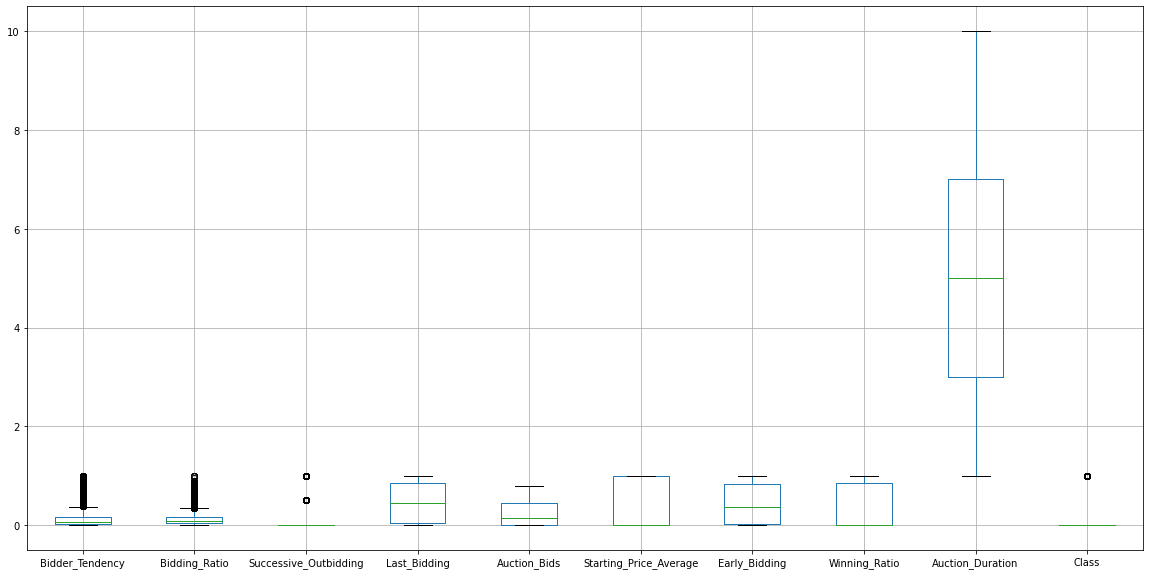

In [210]:
#checking for outliers
fig=plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

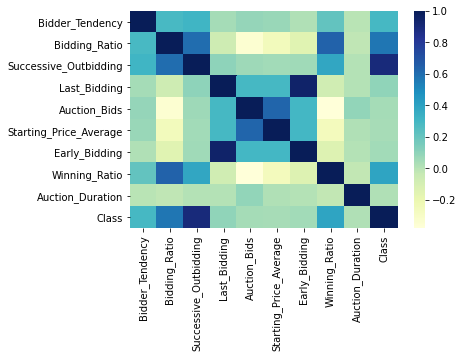

In [211]:
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu")

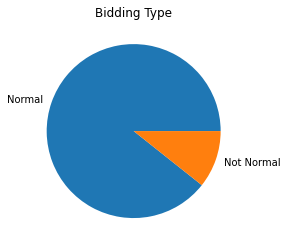

0    5646
1     675
Name: Class, dtype: int64

In [212]:
#summary of Classes
classes=df['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

dataset is clearly unbalanced


# Dealing with unbalanced dataset

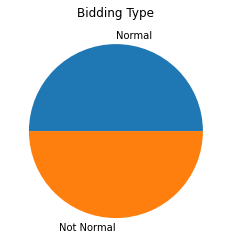

1    5646
0    5646
Name: Class, dtype: int64

In [213]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline

#splitting the data set into training and testing data
X = df.drop(['Class'],axis=1)
y = df["Class"]

#oversampling
overSampler = RandomOverSampler(random_state=42)
overX,overY=overSampler.fit_resample(X, y)

#summary of Classes after OverSampling
classes=pd.DataFrame(overY,columns=['Class'])['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

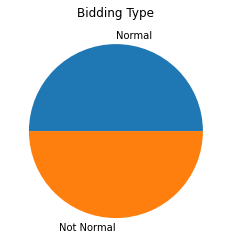

1    675
0    675
Name: Class, dtype: int64

In [214]:
#undersampling
underSampler = RandomUnderSampler(random_state=42)
underX,underY=underSampler.fit_resample(X, y)

#summary of Classes after undersampling
classes=pd.DataFrame(underY,columns=['Class'])['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

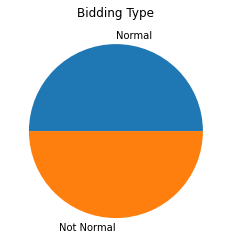

1    5646
0    5646
Name: Class, dtype: int64

In [215]:
smoteSampler = SMOTE(random_state=42)
smoteX,smoteY=smoteSampler.fit_resample(X, y)

#summary of Classes after SMOTE
classes=pd.DataFrame(smoteY,columns=['Class'])['Class'].value_counts()
plt.pie(classes,labels = ['Normal', 'Not Normal'])  
plt.title ("Bidding Type")
plt.show()
classes

For the rest of the notebook we are going to try the new SMOTE sampled dataset and check up on the model performances using ROC curve and confusion matrix

In [216]:
#trying the new datasets instead of the original
#X,y = overX,overY
#X,y = underX,underY
#X,y = smoteX,smoteY

#after trying all datasets, all accuracies drop, ROC and confusion matrix indicates worse performance  

# KMeans Clustering


In [217]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) 
X =  kmeans.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



# Using Random Forest to predict Class


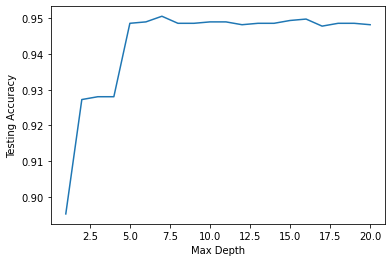

In [218]:
r_range = range(1, 21)
scores = []
for R in r_range:
    RD = Pipeline([('scaler', MinMaxScaler()),('RD', RandomForestClassifier(n_estimators=1000 ,max_depth= R))]) 
    RD.fit(X_train, y_train)
    R_pred = RD.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, R_pred))
plt.plot(r_range, scores)
plt.xlabel('Max Depth')
plt.ylabel('Testing Accuracy')
plt.show()

In [219]:
#finding best depth
max_value = max(scores)
max_index = scores.index(max_value)
best_depth = max_index+1
print(best_depth)

7


In [220]:
RD = Pipeline([('scaler', MinMaxScaler()),('RD', RandomForestClassifier(n_estimators=1000 ,max_depth= best_depth))]) 
RD.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('RD', RandomForestClassifier(max_depth=7, n_estimators=1000))])

In [221]:
print("Accuracy on training set: {:.3f}".format(RD.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RD.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.951


In [222]:
rpred=RD.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rpred))

Accuracy: 0.9509687623566627


C:\Users\Zew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


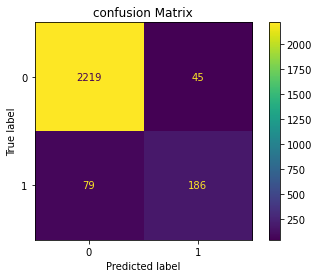

In [223]:
plot_confusion_matrix(RD, X_test, y_test)  
plt.title('confusion Matrix')
plt.show()

No Skill: ROC AUC=0.500
RD: ROC AUC=0.950


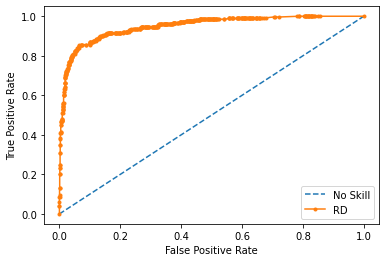

In [224]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
RD_probs = RD.predict_proba(X_test)
# keep probabilities for the positive outcome only
RD_probs = RD_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RD_auc = roc_auc_score(y_test, RD_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RD: ROC AUC=%.3f' % (RD_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RD_fpr, RD_tpr, _ = roc_curve(y_test, RD_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(RD_fpr, RD_tpr, marker='.', label='RD')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

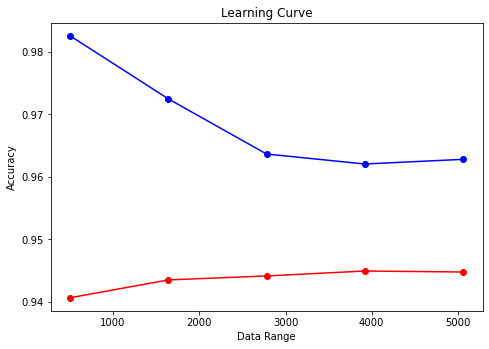

In [225]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(RD, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [226]:
y_pred =RD.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2264
           1       0.81      0.70      0.75       265

    accuracy                           0.95      2529
   macro avg       0.89      0.84      0.86      2529
weighted avg       0.95      0.95      0.95      2529



In [227]:
mse, bias, var = bias_variance_decomp(RD,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.053
Bias: 0.046
Variance: 0.007


# using SVM to predict Class


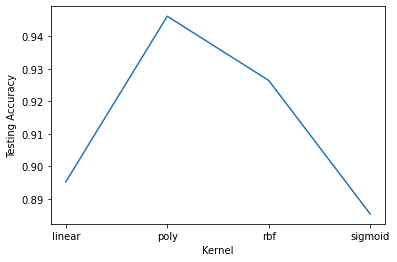

In [228]:

kernels = ['linear','poly','rbf','sigmoid']
scores = []
for k in kernels:
    svmm = Pipeline([('scaler', MinMaxScaler()),('svmm', svm.SVC(kernel=k,probability=True))]) 
    svmm.fit(X_train,y_train)
    svmm_pred = svmm.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, svmm_pred))
plt.plot(kernels, scores)
plt.xlabel('Kernel')
plt.ylabel('Testing Accuracy')
plt.show()

In [229]:
#finding best kernel
max_value = max(scores)
max_index = scores.index(max_value)
print(kernels[max_index])

poly


In [230]:
svmm = Pipeline([('scaler', MinMaxScaler()),('svmm', svm.SVC(kernel=kernels[max_index],probability=True))]) 
svmm.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svmm', SVC(kernel='poly', probability=True))])

In [231]:
print("Accuracy on training set: {:.3f}".format(svmm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmm.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.946


In [232]:
svmmpred=svmm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, svmmpred))

Accuracy: 0.9462238038750495


C:\Users\Zew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


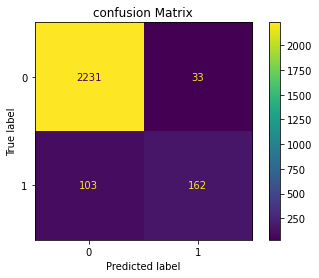

In [233]:
plot_confusion_matrix(svmm, X_test, y_test)  
plt.title('confusion Matrix')
plt.show()

No Skill: ROC AUC=0.500
svm: ROC AUC=0.929


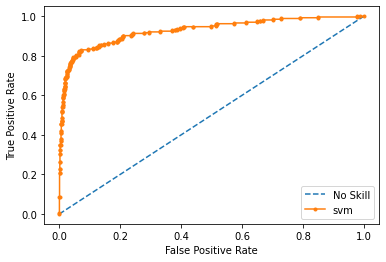

In [234]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
svmm_probs = svmm.predict_proba(X_test)
# keep probabilities for the positive outcome only
svmm_probs = svmm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svmm_auc = roc_auc_score(y_test, svmm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('svm: ROC AUC=%.3f' % (svmm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svmm_fpr, svmm_tpr, _ = roc_curve(y_test, svmm_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svmm_fpr, svmm_tpr, marker='.', label='svm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

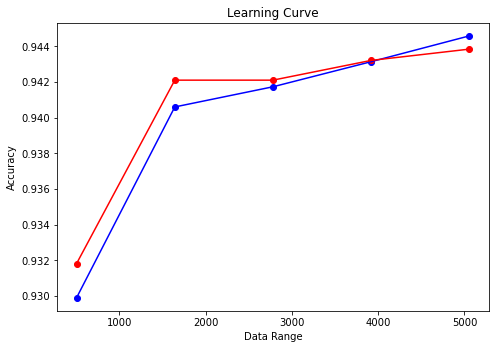

In [235]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svmm, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [236]:
y_pred =svmm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2264
           1       0.83      0.61      0.70       265

    accuracy                           0.95      2529
   macro avg       0.89      0.80      0.84      2529
weighted avg       0.94      0.95      0.94      2529



In [237]:
mse, bias, var = bias_variance_decomp(svmm,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.054
Bias: 0.052
Variance: 0.003


# Using logistic Regression to predict Class


In [238]:
solver= ["lbfgs",'liblinear', 'newton-cg', 'sag', 'saga']
solver_scores = []

for s in solver:
    LR = Pipeline([('scaler', MinMaxScaler()),('LR', LogisticRegression(random_state=42,solver=s, max_iter=10000))]) 
    print(s)
    LR.fit(X, y)
    acc = LR.score(X_train, y_train)
    acc2 = LR.score(X_test, y_test)
    solver_scores.append(acc2)
    print('Training Accuracy ('+ s + '): ' + str(acc))
    print('Test Accuracy ('+ s + '): ' + str(acc2))
    print()



lbfgs
Training Accuracy (lbfgs): 0.8918776371308017
Test Accuracy (lbfgs): 0.8952155001977066

liblinear
Training Accuracy (liblinear): 0.8918776371308017
Test Accuracy (liblinear): 0.8952155001977066

newton-cg
Training Accuracy (newton-cg): 0.8918776371308017
Test Accuracy (newton-cg): 0.8952155001977066

sag
Training Accuracy (sag): 0.8918776371308017
Test Accuracy (sag): 0.8952155001977066

saga
Training Accuracy (saga): 0.8918776371308017
Test Accuracy (saga): 0.8952155001977066



In [239]:
#finding best solver
max_value = max(solver_scores)
max_index = solver_scores.index(max_value)
print(solver[max_index])

lbfgs


In [240]:
LR = Pipeline([('scaler', MinMaxScaler()),('LR', LogisticRegression(random_state=42,solver = solver[max_index], max_iter=10000))]) 
LR.fit(X, y)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('LR', LogisticRegression(max_iter=10000, random_state=42))])

In [241]:
print("Accuracy on training set: {:.3f}".format(LR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test, y_test)))

Accuracy on training set: 0.892
Accuracy on test set: 0.895


In [242]:
LRpred=LR.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, LRpred))

Accuracy: 0.8952155001977066


C:\Users\Zew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


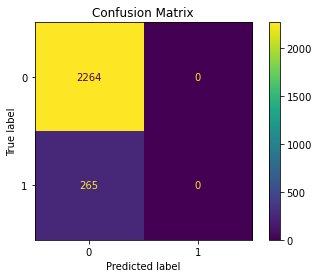

In [243]:
plot_confusion_matrix(LR, X_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.734


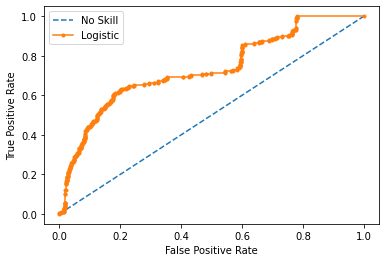

In [244]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

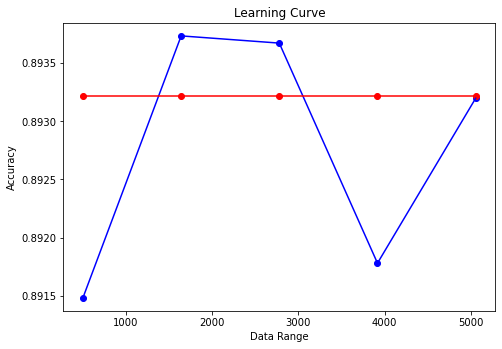

In [245]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(LR, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [246]:
y_pred =LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2264
           1       0.00      0.00      0.00       265

    accuracy                           0.90      2529
   macro avg       0.45      0.50      0.47      2529
weighted avg       0.80      0.90      0.85      2529



C:\Users\Zew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [247]:
mse, bias, var = bias_variance_decomp(LR,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.105
Bias: 0.105
Variance: 0.000


# Building ensemble model of all 3 models

In [248]:
from sklearn.ensemble import VotingClassifier

voting_clf_hard = VotingClassifier(
    estimators=[('RD', RD), ('LR', LR), ('svm', svmm)],
    voting='hard')

voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('RD',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('RD',
                                               RandomForestClassifier(max_depth=7,
                                                                      n_estimators=1000))])),
                             ('LR',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('LR',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=42))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svmm',
                                               SVC(kernel='poly',
                                                   probability=True))]))])

In [249]:
print("Accuracy on training set: {:.3f}".format(voting_clf_hard.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(voting_clf_hard.score(X_test, y_test)))

Accuracy on training set: 0.949
Accuracy on test set: 0.946


In [250]:
voting_clf_soft = VotingClassifier(
    estimators=[('RD', RD), ('LR', LR), ('svm', svmm)],
    voting='soft')

voting_clf_soft.fit(X_train, y_train)


VotingClassifier(estimators=[('RD',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('RD',
                                               RandomForestClassifier(max_depth=7,
                                                                      n_estimators=1000))])),
                             ('LR',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('LR',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=42))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svmm',
                                               SVC(kernel='poly',
                                                   probability=True))]))],
                 vot

In [251]:
from sklearn.metrics import accuracy_score
model_scores = []
for clf in (RD, LR, svmm, voting_clf_soft,voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    model_scores.append(accuracy_score(y_test, y_pred))

Pipeline 0.9505733491498616
Pipeline 0.8952155001977066
Pipeline 0.9462238038750495
VotingClassifier 0.9422696718070384
VotingClassifier 0.9458283906682483


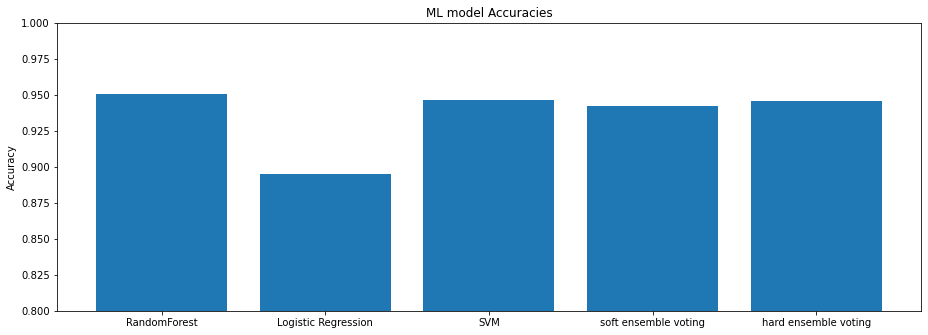

In [252]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,1])
ax.bar(['RandomForest','Logistic Regression','SVM','soft ensemble voting','hard ensemble voting'],model_scores)
ax.set_ylabel('Accuracy')
ax.set_title('ML model Accuracies')
plt.ylim(0.8, 1)
plt.show()